### mdai python api test

In [1]:
import os
import sys
import random
import math
import numpy as np
import pandas as pd 
import cv2
import matplotlib.pyplot as plt

import io
import hashlib 
import json
import pydicom

import tensorflow as tf
from object_detection.utils import dataset_util

/home/txia/.pyenv/versions/3.6.5/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/txia/.pyenv/versions/3.6.5/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
#!pip install --upgrade mdai 

# local import 
import os 
import sys
MODULE_DIR = os.path.abspath('../mdai-client-py')
print(MODULE_DIR)
sys.path.append(MODULE_DIR) # go to parent dir

/home/txia/mdai-git/mdai-client-py


In [3]:
import mdai 

import importlib
importlib.reload(mdai)
importlib.reload(mdai.preprocess)
importlib.reload(mdai.client)
importlib.reload(mdai.visualize)

<module 'mdai.visualize' from '/home/txia/mdai-git/mdai-client-py/mdai/visualize.py'>

In [4]:
mdai_client = mdai.Client(domain='staging.md.ai', access_token="")
p = mdai_client.project('bwRnkNW2', path='/data/UnitTest') #, force_download=True)

Successfully authenticated to staging.md.ai.
Using path '/data/UnitTest' for data.
Preparing annotations export for project bwRnkNW2...                                                
Using cached annotations data for project bwRnkNW2.
Preparing images export for project bwRnkNW2...                                                     
Using cached images data for project bwRnkNW2.


In [5]:
# get labels based on set group 
p.show_label_groups()

Label Group, Id: G_L3dP31, Name: Default group
	Labels:
	Id: L_egJRyg, Name: boundingbox
	Id: L_MgevP2, Name: polygon
	Id: L_D21YL2, Name: freefrom
	Id: L_lg7klg, Name: line
	Id: L_eg69RZ, Name: location
	Id: L_GQoaJg, Name: global_image
	Id: L_JQVWjZ, Name: global_series
	Id: L_3QEOpg, Name: global_exam

Label Group, Id: G_WVRrVJ, Name: label_group_b
	Labels:
	Id: L_pgrYdZ, Name: label_1



In [6]:
labels_dict = {'L_egJRyg':1, # bounding box
               'L_MgevP2':2, # polygon 
               'L_D21YL2':3, # freeform 
               'L_lg7klg':4, # line 
               'L_eg69RZ':5, # location 
               'L_GQoaJg':6, # global_image 
               'L_JQVWjZ':7, # global_series
               'L_3QEOpg':8  # global_exam 
              }
print(labels_dict)
p.set_labels_dict(labels_dict)

{'L_egJRyg': 1, 'L_MgevP2': 2, 'L_D21YL2': 3, 'L_lg7klg': 4, 'L_eg69RZ': 5, 'L_GQoaJg': 6, 'L_JQVWjZ': 7, 'L_3QEOpg': 8}
bbox
polygon
freeform
line
location
None
None
None


In [7]:
assert p.get_label_id_annotation_mode('L_MgevP2') == 'polygon'

### Data exploration

In [8]:
p.show_datasets()

Datasets:
Id: D_qGQdpN, Name: ct
Id: D_0Z4nDG, Name: xray



In [9]:
ct_dataset = p.get_dataset_by_id('D_qGQdpN')
ct_dataset.prepare()

xray_dataset = p.get_dataset_by_id('D_0Z4nDG')
xray_dataset.prepare()

In [10]:
assert ct_dataset.classes_dict == xray_dataset.classes_dict

In [11]:
xray_dataset.classes_dict

{'L_egJRyg': {'class_id': 1,
  'class_text': 'boundingbox',
  'class_annotation_mode': 'bbox',
  'scope': 'instance',
  'type': 'local'},
 'L_MgevP2': {'class_id': 2,
  'class_text': 'polygon',
  'class_annotation_mode': 'polygon',
  'scope': 'instance',
  'type': 'local'},
 'L_D21YL2': {'class_id': 3,
  'class_text': 'freefrom',
  'class_annotation_mode': 'freeform',
  'scope': 'instance',
  'type': 'local'},
 'L_lg7klg': {'class_id': 4,
  'class_text': 'line',
  'class_annotation_mode': 'line',
  'scope': 'instance',
  'type': 'local'},
 'L_eg69RZ': {'class_id': 5,
  'class_text': 'location',
  'class_annotation_mode': 'location',
  'scope': 'instance',
  'type': 'local'},
 'L_GQoaJg': {'class_id': 6,
  'class_text': 'global_image',
  'class_annotation_mode': None,
  'scope': 'instance',
  'type': 'global'},
 'L_JQVWjZ': {'class_id': 7,
  'class_text': 'global_series',
  'class_annotation_mode': None,
  'scope': 'series',
  'type': 'global'},
 'L_3QEOpg': {'class_id': 8,
  'class_tex

In [12]:
image_ids = ct_dataset.get_image_ids()  
assert len(image_ids) == len(ct_dataset.imgs_anns_dict.keys())

In [13]:
train_ds, valid_ds = mdai.utils.common_utils.train_test_split(ct_dataset, shuffle=False, validation_split=0.2)

Num of instances for training set: 9, validation set: 3


In [14]:
assert len(train_ds.get_image_ids()) == 9
assert len(valid_ds.get_image_ids()) == 3 

Input image pixel range exceeds 255, rescaling for visualization.
Input image pixel range exceeds 255, rescaling for visualization.
Input image pixel range exceeds 255, rescaling for visualization.


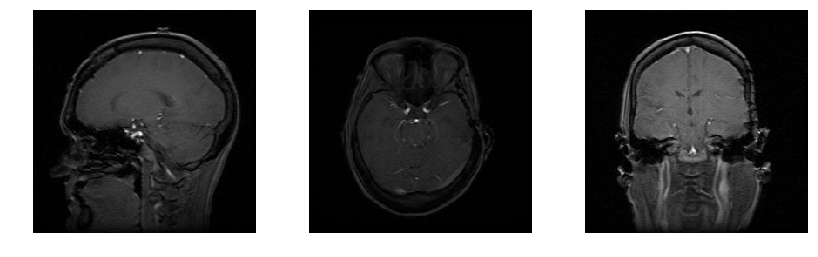

In [15]:
mdai.visualize.display_images(valid_ds.get_image_ids())

Input image pixel range exceeds 255, rescaling for visualization.
Input image pixel range exceeds 255, rescaling for visualization.
Input image pixel range exceeds 255, rescaling for visualization.
Input image pixel range exceeds 255, rescaling for visualization.
Input image pixel range exceeds 255, rescaling for visualization.
Input image pixel range exceeds 255, rescaling for visualization.
Input image pixel range exceeds 255, rescaling for visualization.
Input image pixel range exceeds 255, rescaling for visualization.
Input image pixel range exceeds 255, rescaling for visualization.
Input image pixel range exceeds 255, rescaling for visualization.
Input image pixel range exceeds 255, rescaling for visualization.
Input image pixel range exceeds 255, rescaling for visualization.


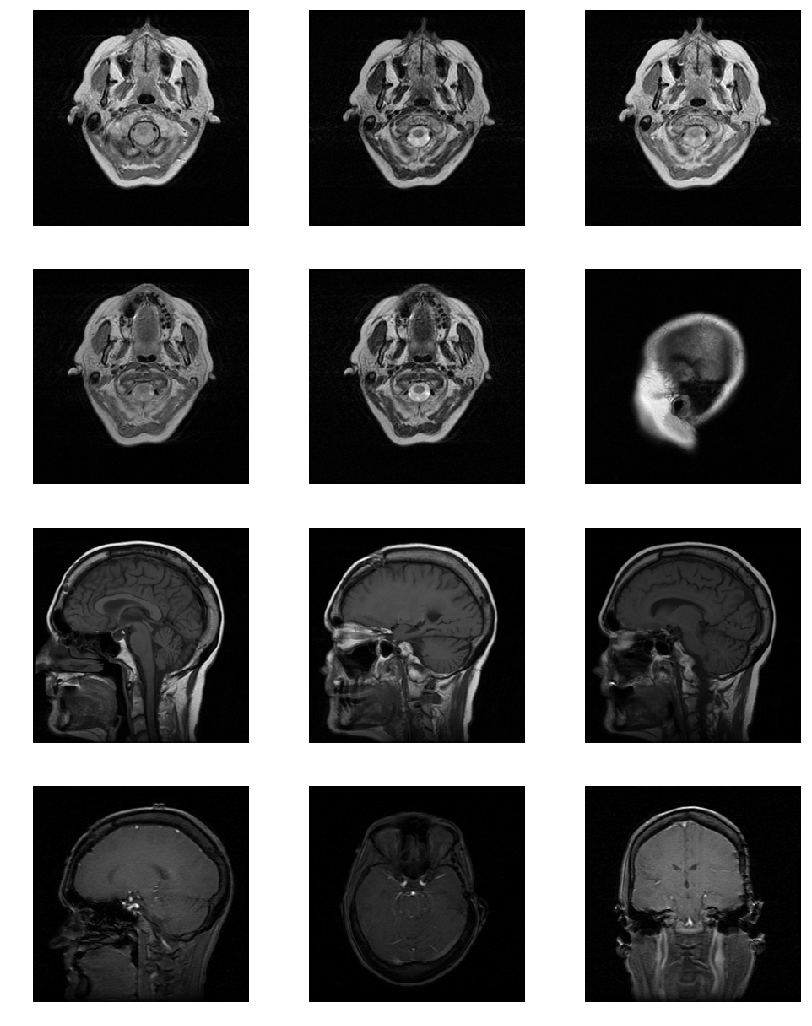

In [16]:
mdai.visualize.display_images(image_ids)

In [17]:
image_id = '/data/UnitTest/mdai_staging_project_bwRnkNW2_images_2018-08-25-192424/1.3.6.1.4.1.14519.5.2.1.4591.4001.194025621413527171873281770983/1.3.6.1.4.1.14519.5.2.1.4591.4001.131964722003279466706528926588/1.3.6.1.4.1.14519.5.2.1.4591.4001.610421640950972361701526779345.dcm'

original_image, gt_class_id, gt_bbox, gt_mask =\
    mdai.visualize.get_image_ground_truth(image_id, ct_dataset)

Input image pixel range exceeds 255, rescaling for visualization.
Number of annotations: 6
Not a local instance


In [18]:
[(ct_dataset.label_id_to_class_annotation_mode(ann['labelId']), ann['labelId']) for ann in ct_dataset.imgs_anns_dict[image_id]]

[('line', 'L_lg7klg'),
 ('polygon', 'L_MgevP2'),
 ('freeform', 'L_D21YL2'),
 ('bbox', 'L_egJRyg'),
 ('location', 'L_eg69RZ'),
 (None, 'L_3QEOpg')]

In [19]:
grey_image = mdai.visualize.load_dicom_image(image_id)
rgb_image = mdai.visualize.load_dicom_image(image_id, to_RGB=True)
scaled_image_1 = mdai.visualize.load_dicom_image(image_id, rescale=True)

Input image pixel range exceeds 255, rescaling for visualization.


In [20]:
np.amax(scaled_image_1)


255

In [21]:
grey_image.shape

(256, 256)

In [22]:
rgb_image.shape

(256, 256, 3)

In [23]:
np.amax(original_image)

255

In [24]:
len(gt_bbox)

5

In [25]:
gt_bbox

array([[171,  28, 230, 103],
       [134,  34, 181,  79],
       [ 37,  33, 168, 205],
       [182, 100, 212, 139],
       [136,  84, 151,  99]], dtype=int32)

In [26]:
gt_class_id

array([4, 2, 3, 1, 5], dtype=int32)

In [27]:
gt_mask.shape

(256, 256, 5)

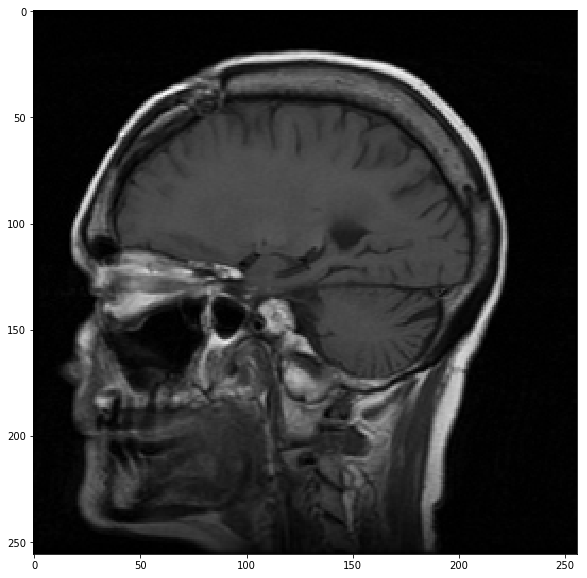

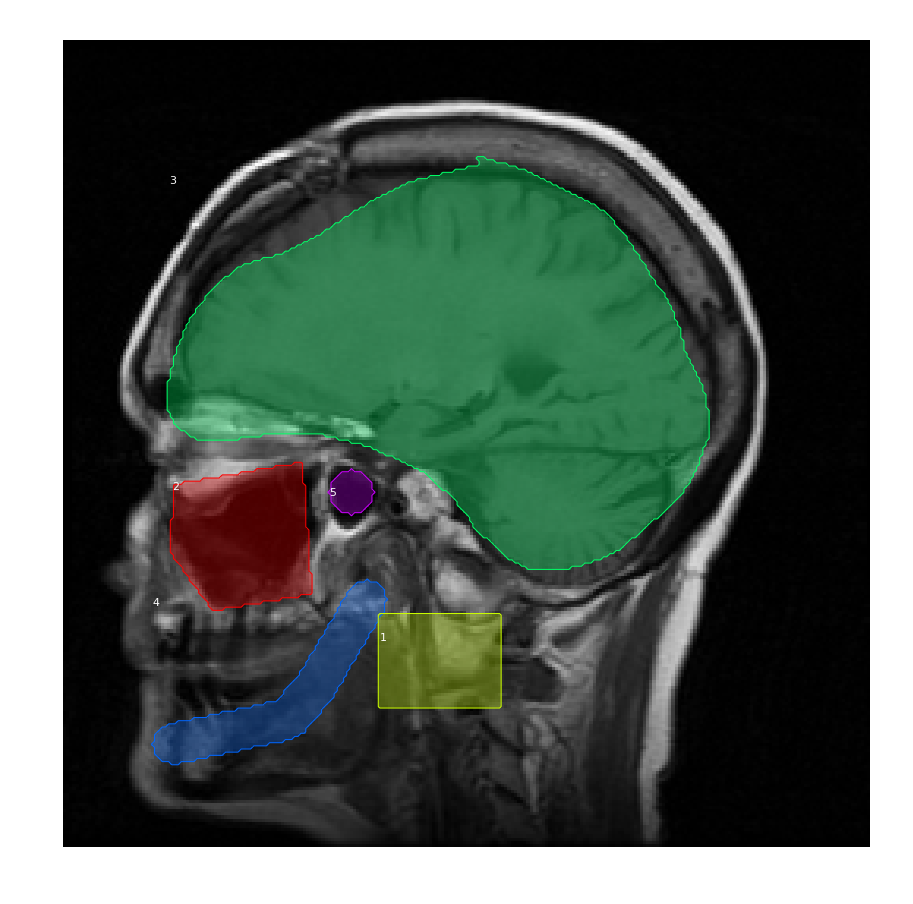

In [28]:
plt.figure( figsize=(20, 10))
plt.imshow(original_image, plt.cm.bone)

mdai.visualize.display_annotations(original_image, gt_bbox, gt_mask, 
                      gt_class_id, show_mask=True, show_bbox=False)

In [29]:
assert image_ids[7] == image_id

Input image pixel range exceeds 255, rescaling for visualization.
Input image pixel range exceeds 255, rescaling for visualization.
Input image pixel range exceeds 255, rescaling for visualization.


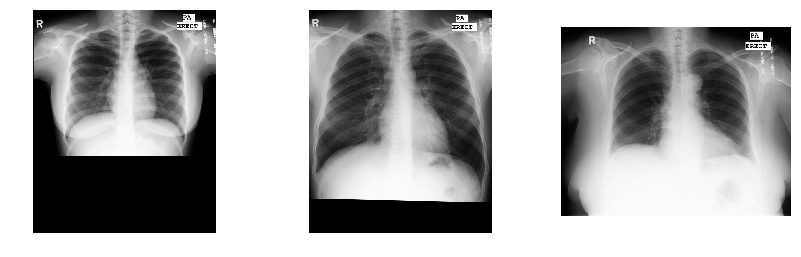

In [30]:
mdai.visualize.display_images(xray_dataset.image_ids)

Input image pixel range exceeds 255, rescaling for visualization.
Number of annotations: 5


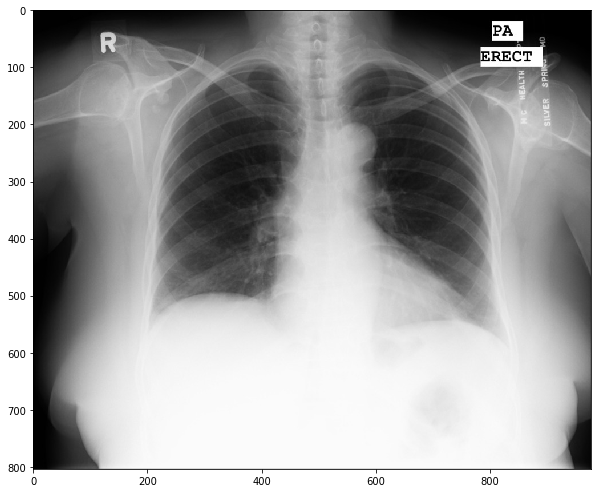

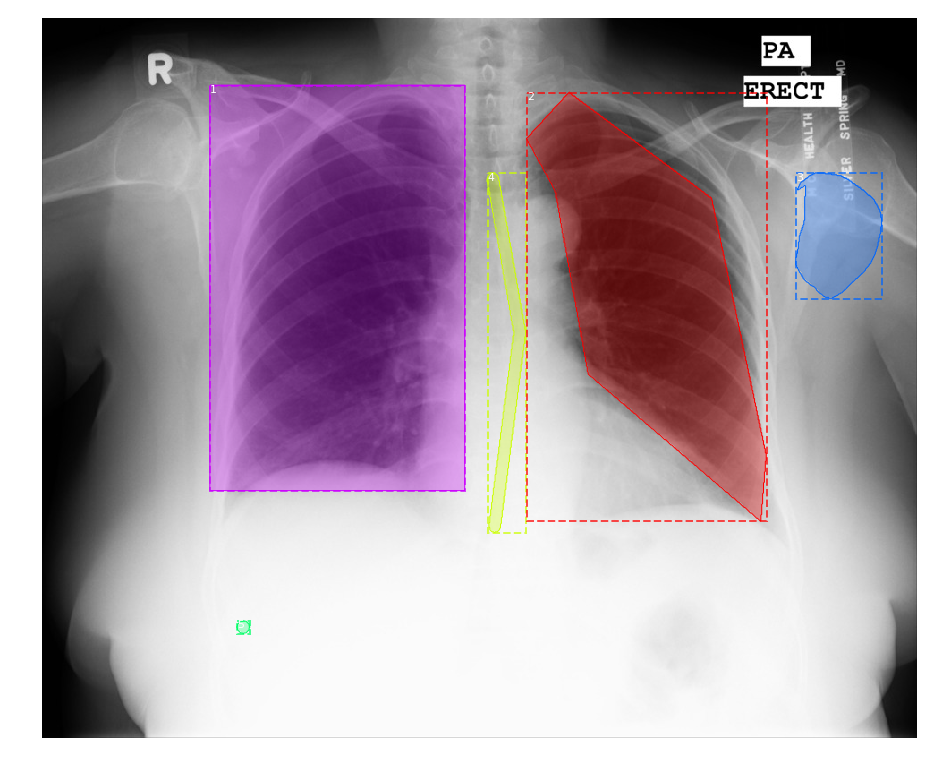

In [31]:
image_id = xray_dataset.image_ids[2]
original_image, gt_class_id, gt_bbox, gt_mask =\
    mdai.visualize.get_image_ground_truth(image_id, xray_dataset)

plt.figure( figsize=(10, 10))
plt.imshow(original_image, plt.cm.bone)

mdai.visualize.display_annotations(original_image, gt_bbox, gt_mask, 
                      gt_class_id, show_mask=True)